In [58]:
import pandas as pd
import pandas.io.data
import numpy as np
import datetime
import matplotlib.pyplot as plt
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 4)

%matplotlib inline

In [59]:
def getStockData(tk,start,end):
    data = pd.io.data.DataReader(tk,"yahoo",start,end)
    data.rename(columns={'Adj Close':'AdjClose'},inplace=True)
    data.insert(0,"Ticker",tk)
    return data

In [60]:
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2016,1,11)
getStockData("GOOG",start,end).head()

           Ticker    Open    High    ...      Close   Volume  AdjClose
Date                                 ...                              
2016-01-04   GOOG  743.00  744.06    ...     741.84  3272800    741.84
2016-01-05   GOOG  746.45  752.00    ...     742.58  1950700    742.58
2016-01-06   GOOG  730.00  747.18    ...     743.62  1947000    743.62
2016-01-07   GOOG  730.31  738.50    ...     726.39  2963700    726.39
2016-01-08   GOOG  731.45  733.23    ...     714.47  2450900    714.47

[5 rows x 7 columns]

In [61]:
#get multiple tickers
def getMultipleData(tickers,start,end):
    stocks = dict()
    for ticker in tickers:
        s = getStockData(ticker,start,end)
        stocks[ticker] =s 
    return stocks

In [62]:
arr = getMultipleData(["MSFT","AAPL"],start,end)
arr['MSFT'][:3]

           Ticker   Open   High    ...     Close    Volume  AdjClose
Date                               ...                              
2016-01-04   MSFT  54.32  54.80    ...     54.80  53778000    54.031
2016-01-05   MSFT  54.93  55.39    ...     55.05  34079700    54.278
2016-01-06   MSFT  54.32  54.40    ...     54.05  39518900    53.292

[3 rows x 7 columns]

In [63]:
def pivotTicket(arr,column):
    items = []
    for key in arr:
        data = arr[key]
        subset = data[["Ticker",column]]
        items.append(subset)
    combined = pd.concat(items)
    ri = combined.reset_index()
    return ri.pivot("Date","Ticker",column)

In [64]:
closepx = pivotTicket(arr,"AdjClose")
closepx[:3]

Ticker         AAPL    MSFT
Date                       
2016-01-04  104.147  54.031
2016-01-05  101.537  54.278
2016-01-06   99.550  53.292

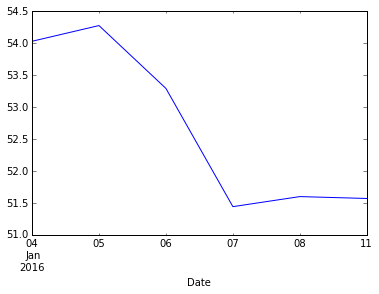

In [65]:
# single company plot
closepx['MSFT'].plot()

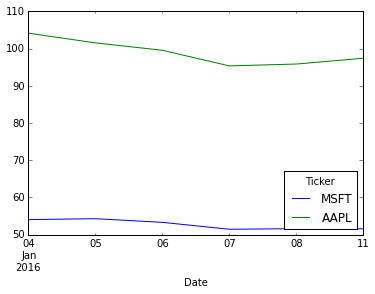

In [66]:
# single company plot
closepx[['MSFT','AAPL']].plot()

In [67]:
volumes = pivotTicket(arr,"Volume")
volumes.tail()

Ticker          AAPL      MSFT
Date                          
2016-01-05  55791000  34079700
2016-01-06  68457400  39518900
2016-01-07  81094400  56564900
2016-01-08  70798000  48754000
2016-01-11  49739400  36943800

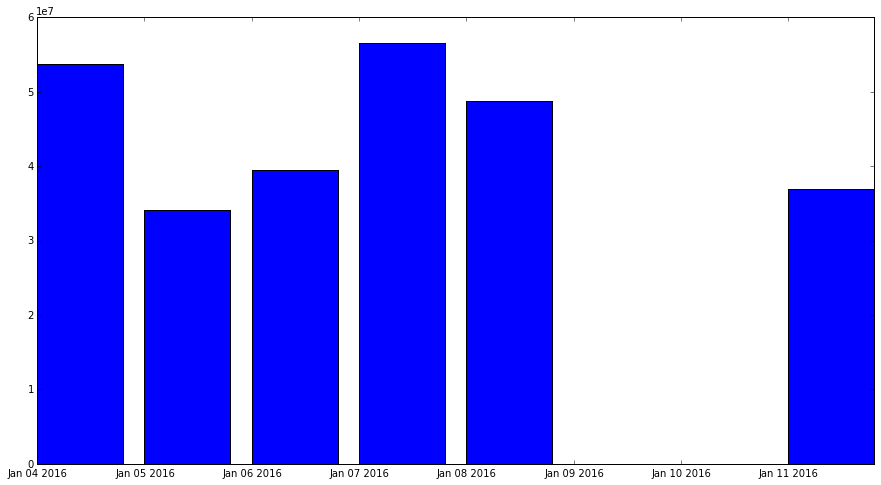

In [70]:
msft = volumes[["MSFT"]]
plt.bar(msft.index,msft["MSFT"])
plt.gcf().set_size_inches(15,8)